# Customer Churn Prediction Notebook

## Introduction
This notebook is focused on predicting whether a customer is going to churn or not, based on a dataset of customer information.

## Data
The dataset contains the following information:

* Customer ID
* Gender
* Age
* Contract type
* Payment method
* Monthly charges
* Total charges
* Churn (the target variable)
* etc

## Methodology
We will be using a machine learning model to predict whether a customer will churn or not. The model will be trained on a training dataset and evaluated on a validation dataset. Once the model has been trained and evaluated, we will use it to make predictions on a test dataset.

## Results
We will evaluate the performance of the machine learning model using metrics such as accuracy, precision, recall, and F1 score. Based on these metrics, we will determine whether the model is performing well or if it needs further tuning.

## Conclusion
The results of this notebook will provide insights into the factors that contribute to customer churn and a machine learning model that can be used to predict whether a customer is going to churn or not. These insights can be used to develop strategies for reducing customer churn and improving customer retention.

### 1. Import Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### 2. Load Data

In [191]:
df = pd.read_csv("180 Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. Exploratory Data Analysis

In [193]:
df.columns = df.columns.str.lower()

In [194]:
len(df)

7032

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [196]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [197]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

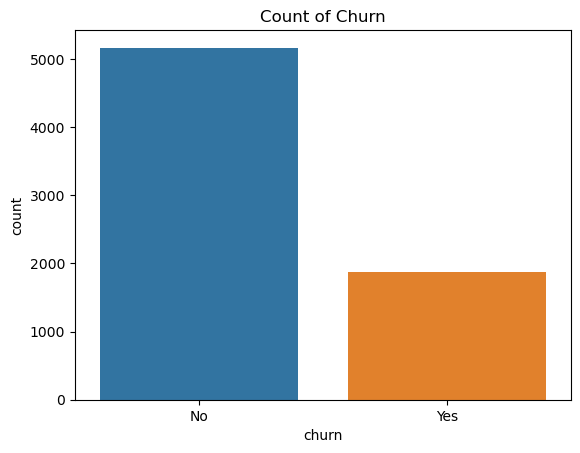

In [198]:
plt.title("Count of Churn")
sns.countplot(data=df,x="churn")
plt.show()

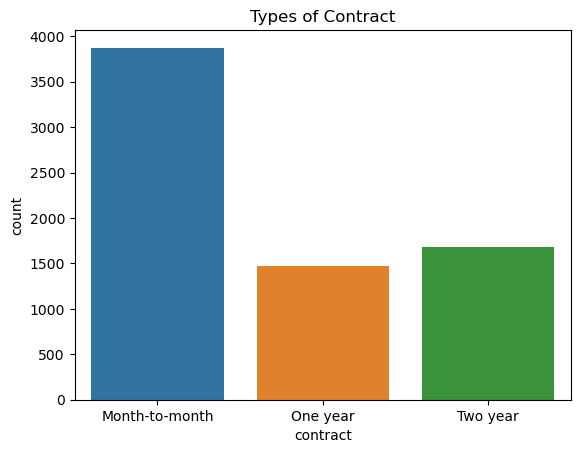

In [199]:
plt.title("Types of Contract")
sns.countplot(data=df,x="contract")
plt.show()

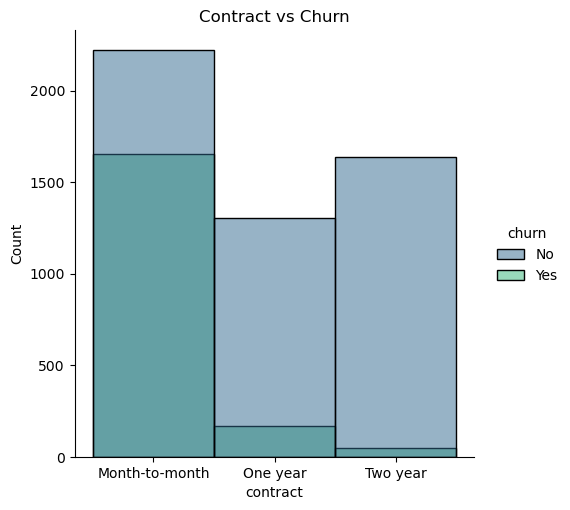

In [200]:
sns.displot(data=df,x="contract",hue="churn",palette="viridis")
plt.title("Contract vs Churn")
plt.show()

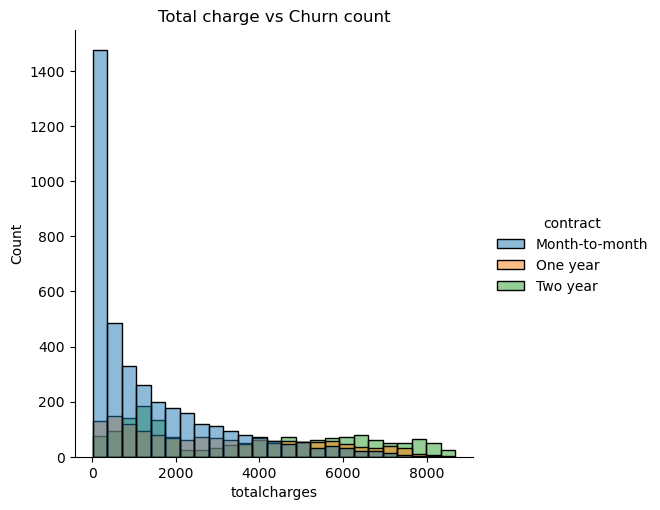

In [201]:
sns.displot(data=df,x="totalcharges",hue="contract")
plt.title("Total charge vs Churn count")
plt.show()

### 4. Data Preprocessing

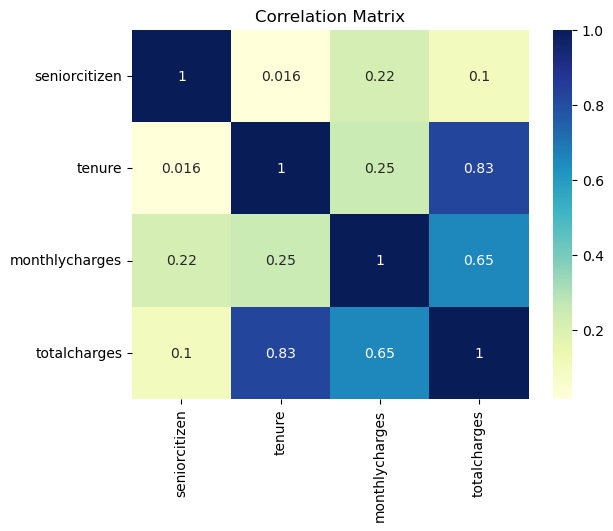

In [203]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [204]:
df.drop("customerid",axis=1,inplace=True)

In [205]:
from sklearn.preprocessing import LabelEncoder

object_cols = df.select_dtypes("object").columns

label_encoder = LabelEncoder()

for object_name in object_cols:
    df[object_name] = label_encoder.fit_transform(df[object_name])

df


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7028,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7029,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### 5. Modelling and Evaluation

In [207]:
from sklearn.model_selection import train_test_split

X = df.drop("churn",axis=1)
y = df["churn"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)

(5625, 1407, 5625, 1407)

In [208]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [209]:
score = {}

def report(model):

    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)

    print(classification_report(y_test,y_preds))

    conf_matrix = confusion_matrix(y_test,y_preds)
    
    plt.title("Confusion Matrix")
    sns.heatmap(conf_matrix,annot=True,lw=5,cmap="viridis",fmt="g")

    score[model.__class__.__name__] = accuracy_score(y_test,y_preds)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



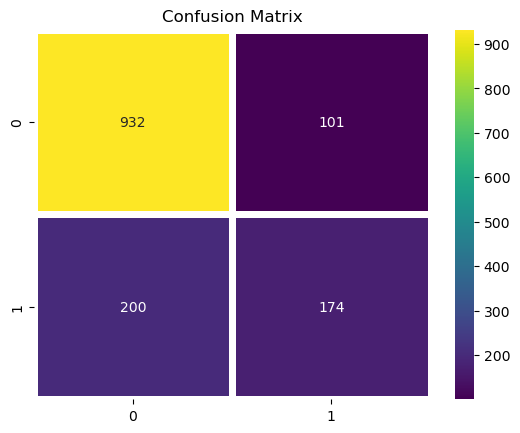

In [210]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
report(model)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



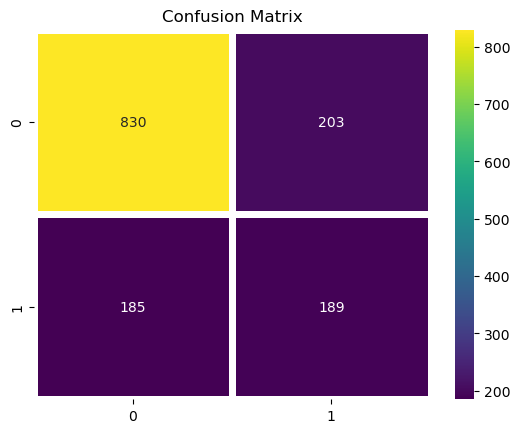

In [211]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
report(model)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



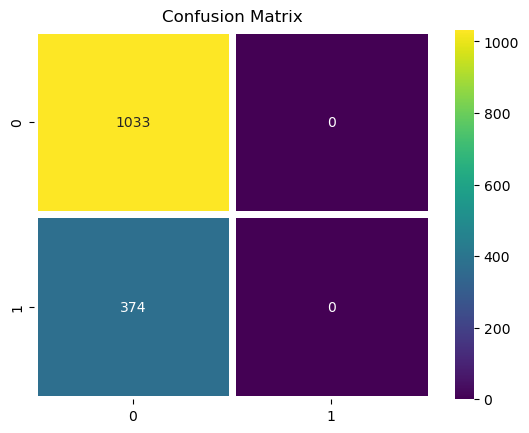

In [212]:
from sklearn.svm import SVC,LinearSVC

model = SVC()
report(model)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



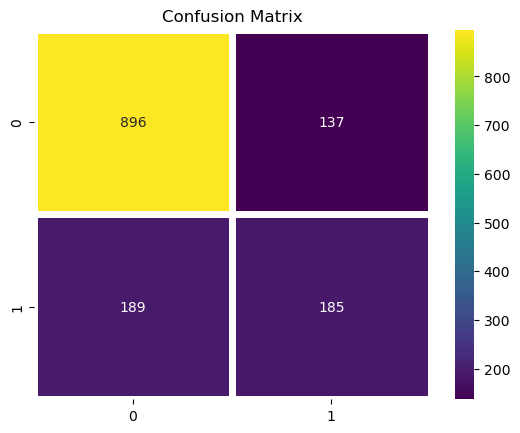

In [213]:
model = LinearSVC()
report(model)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



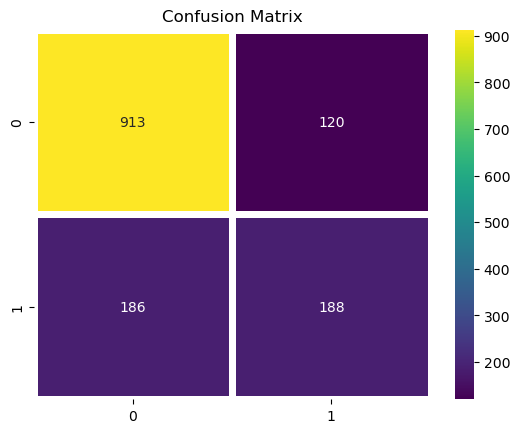

In [214]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
report(model)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.44      0.51       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



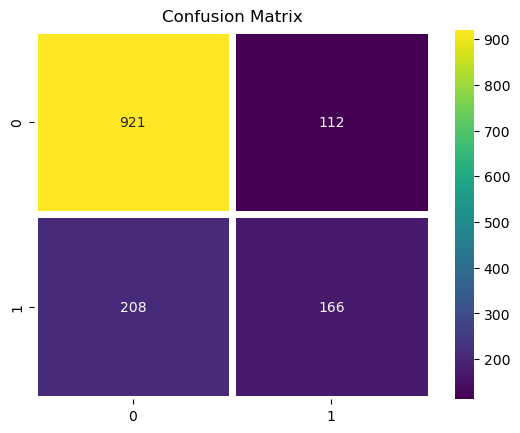

In [215]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
report(model)

In [224]:
score

{'RandomForestClassifier': 0.7860696517412935,
 'DecisionTreeClassifier': 0.7242359630419332,
 'SVC': 0.7341862117981521,
 'LinearSVC': 0.7683013503909026,
 'LogisticRegression': 0.7825159914712153,
 'KNeighborsClassifier': 0.7725657427149965}

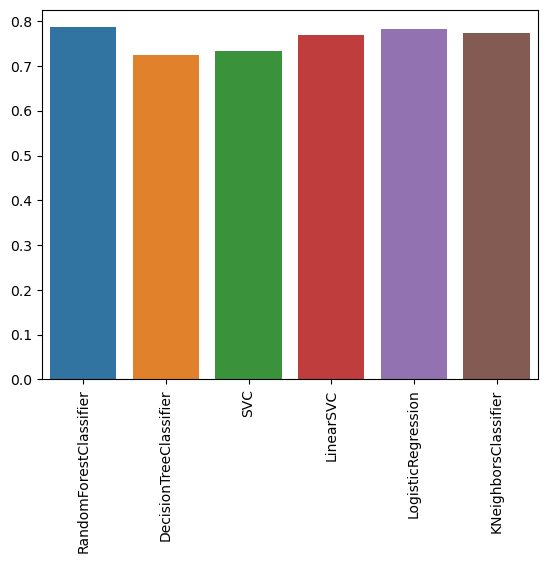

In [217]:
sns.barplot(x=list(score.keys()),y=list(score.values()))
plt.xticks(rotation=90)
plt.show()

### `RandomForestClassifier` Algorithm gives the overall best performance with accuracy around 80%